In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from netCDF4 import Dataset, num2date
from ipdb import set_trace as mybreak
import pyicon as pyic
import cartopy.crs as ccrs
from matplotlib_scalebar.scalebar import ScaleBar
import glob
import pickle
import maps_icon_smt_temp as smt
import datetime
from matplotlib.patches import Rectangle
import cfgrib
import xarray as xr
import pandas as pd
import gsw
import matplotlib.gridspec as gridspec
from icon_smt_levels import dzw, dzt, depthc, depthi

-----calc
sys glob os
numpy
netcdf
Done modules calc.
-----calc_xr
sys glob os
numpy
netcdf
xarray
Done modules calc.
-----tb
sys
json
numpy
scipy
netcdf datetime
matplotlib
mybreak
pnadas
xarray
done xarray
-----IconData
-----plotting
-----view
-----calc
-----calc_xr
-----tb
-----IconData
-----plotting
-----view
-----quickplots
-----quickplots


In [30]:
reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
fpath_tgrid  = '/home/mpim/m300602/work/icon/grids/smt/smt_tgrid.nc'
f = Dataset(fpath_tgrid, 'r')
clon = f.variables['clon'][:] * 180./np.pi # center longitude
clat = f.variables['clat'][:] * 180./np.pi # center latitude
f.close()

In [3]:
# depth
iz = 3
print('depth =', depthi[iz])
# coriolis
f=2*2*np.pi/86400*np.sin(40*np.pi/180.)
f2 = f**2
ftime0 = '2010-03-21T05:00:00'
f

path_data    = f'/work/mh0033/u241317/smt/N2/pp_calc_N2_period_{ftime0}.nc'
dN2 = xr.open_dataset(path_data)
#N2 = dN2.isel(depthi=iz).N2

path_data    = f'/work/mh0033/u241317/smt/db/pp_calc_b_period_{ftime0}.nc'
db = xr.open_dataset(path_data)
#b  = db.b.isel(depthi=iz)
#dbdx = db.dbdx.isel(depthi=iz)
#dbdy = db.dbdy.isel(depthi=iz)
#M2 = (dbdx**2 + dbdy**2)

#Ri_b = N2 * f2  / M2

path_data    = f'/work/mh0033/u241317/smt/w/pp_calc_w_{ftime0}.nc'
dw = xr.open_dataset(path_data)
#w = dw.isel(depthi=iz).w

#wb = w*b

depth = 11.0


In [4]:
lon_regm = [-61, -60.6]
lon_regm = [-64, -60]
lat_regm = [39.8, 41.5]
fpath_ckdtree = '/mnt/lustre01/work/mh0033/m300602/proj_vmix/icon/icon_ckdtree/rectgrids/smt_res0.02_180W-180E_90S-90N.npz'

In [20]:
A = db.b #.isel(depthi=6)
lon, lat, toi = pyic.interp_to_rectgrid(A, fpath_ckdtree, lon_reg=lon_regm, lat_reg=(lat_regm[0],lat_regm[0]+0.02))
toi = np.array(toi)
toi = toi.squeeze()

<ipython-input-5-1add96ca27fe>:4: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax0.pcolormesh(lon, depthi, toi,  vmin=-0.022, vmax=-0.012, cmap='RdYlBu_r')


(200.0, 0.0)

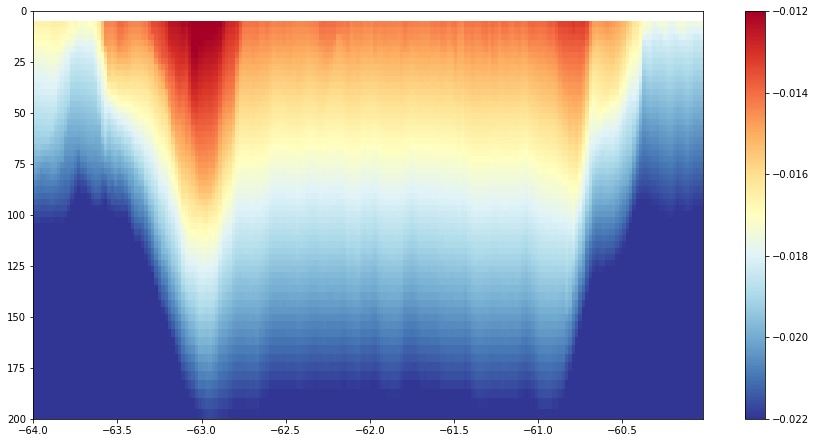

In [5]:
ylim=(200,0)
clim = np.array([-0.025,-0.02])
fig, ax0 = plt.subplots( figsize=(15,7.5))
im = ax0.pcolormesh(lon, depthi, toi,  vmin=-0.022, vmax=-0.012, cmap='RdYlBu_r')
fig.colorbar(im, ax=ax0)
#ax0.set_title('pcolormesh with levels')
ax0.set_ylim(ylim)

In [6]:
import matplotlib.ticker as ticker
def fmt(x, pos):
    a, b = '{:.2e}'.format(x).split('e')
    b = int(b)
    return r'${}\times10^{{{}}}$'.format(a, b)

In [7]:
ccrs_proj = ccrs.PlateCarree()

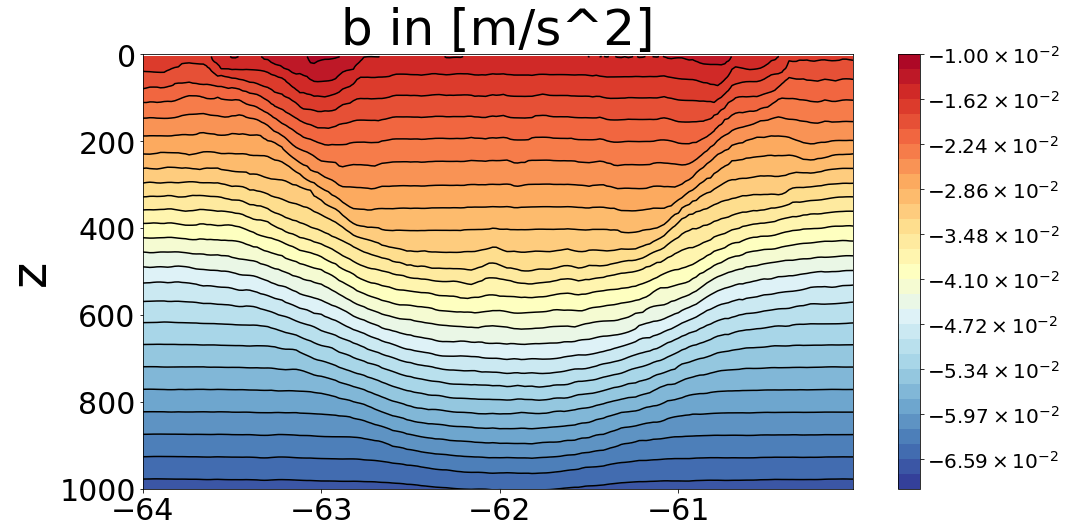

In [8]:
ylim=(1000,0)
levels=np.linspace(-0.07,-0.01, 30)
clim = np.array([-0.025,-0.02])
fig, ax0 = plt.subplots( figsize=(15,7.5))
im = ax0.contourf(lon, depthi, toi,  levels=levels, cmap='RdYlBu_r', linestyles='solid')
cbar = fig.colorbar(im, ax=ax0, format=ticker.FuncFormatter(fmt))
#cbar.set_label(label, size=10)
im = ax0.contour(lon, depthi, toi,  levels=levels, colors='black', linestyles='solid')

ax0.set_title('b in [m/s^2]', fontsize='50')
ax0.set_ylabel('z', fontsize='50')
ax0.tick_params(labelsize=30)
cbar.ax.tick_params(labelsize=20)
ax0.set_ylim(ylim)
fig.tight_layout()
plt.savefig('../../../pics/Panel_Meeting/b_vert.png', dpi=300, format='png')

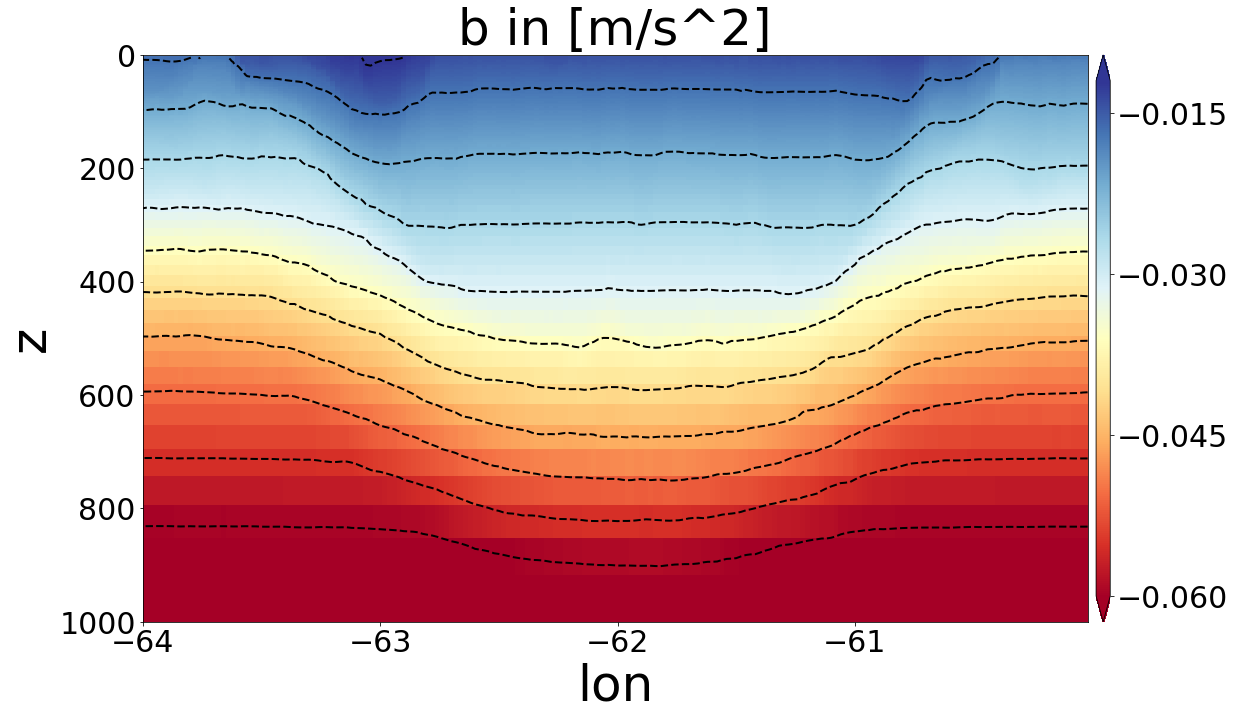

In [21]:
hca, hcb = pyic.arrange_axes(1, 1, plot_cb=True, asp=0.6, fig_size_fac=5,  axlab_kw=None, sharex=False)

ylim=(1000,0)
levels=np.linspace(-0.07,-0.01, 30)
clim = -0.06, -0.012
ii=-1
ii+=1; ax=hca[ii]; cax=hcb[ii]
pyic.shade(lon, depthi, toi, ax=ax, cax=cax, conts=True, contcolor='k',  contlw=2.,
  clim=clim, cmap='RdYlBu')
#fig, ax0 = plt.subplots( figsize=(15,7.5))
#im = ax0.contourf(lon, depthi, toi,  levels=levels, cmap='RdYlBu_r', linestyles='solid')
#cbar = fig.colorbar(im, ax=ax0, format=ticker.FuncFormatter(fmt))
#cbar.set_label(label, size=10)
#ax.contour(lon, depthi, toi,  levels=levels, colors='black', linestyles='solid')

ax.set_title('b in [m/s^2]', fontsize='50')
ax.set_ylabel('z', fontsize='50')
ax.set_xlabel('lon', fontsize='50')
ax.tick_params(labelsize=30)
cax.tick_params(labelsize=30)
ax.set_ylim(ylim)
fig.tight_layout()
plt.savefig('../../../pics/Panel_Meeting/b_vertnc.png', dpi=300, format='png', bbox_inches='tight')

In [103]:
toi

array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [-0.01658594, -0.01656959, -0.0165801 , ..., -0.01759733,
        -0.01757981, -0.01760083],
       [-0.01677538, -0.01675902, -0.01676717, ..., -0.01800976,
        -0.01782398, -0.01780171],
       ...,
       [-0.21275255, -0.21275079, -0.21274787, ..., -0.21286115,
        -0.21285576, -0.2128501 ],
       [-0.23087442, -0.2308716 , -0.2308708 , ..., -0.23099644,
        -0.23098962, -0.23098633],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]], dtype=float32)

<ipython-input-40-92fe950bca55>:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax0.pcolormesh(lon, depthi, toi, vmin=-0.01, vmax=-0.05,  cmap='RdYlBu_r')


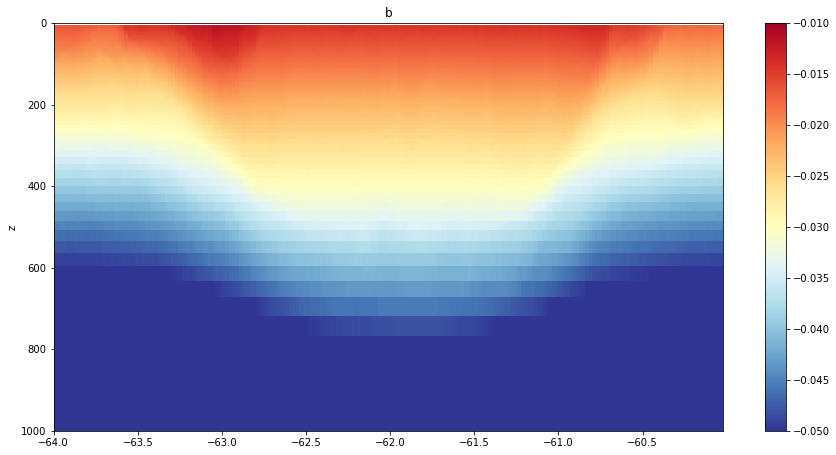

In [40]:
ylim=(1000,0)
levels=np.linspace(-0.025,-0.012, 20)
clim = np.array([-0.025,-0.02])
fig, ax0 = plt.subplots( figsize=(15,7.5))
im = ax0.pcolormesh(lon, depthi, toi, vmin=-0.01, vmax=-0.05,  cmap='RdYlBu_r')
fig.colorbar(im, ax=ax0)
ax0.set_title('b')
ax0.set_ylabel('z')
ax0.set_ylim(ylim)
plt.savefig('../../../pics/Panel_Meeting/b_vert_z.pdf', dpi=150, format='pdf')

In [7]:
lon0, lat0 = -61, 39.8
ic0 = np.argmin( (clon-lon0)**2 + (clat-lat0)**2 ) 
lon1, lat1 = -60.25, 39.8
ic1 = np.argmin( (clon-lon1)**2 + (clat-lat1)**2 ) 

In [18]:
A = dN2.N2 #.isel(depthi=6)
lon, lat, toi = pyic.interp_to_rectgrid(A, fpath_ckdtree, lon_reg=lon_regm, lat_reg=(lat_regm[0],lat_regm[0]+0.02))
toi = np.array(toi)
toi = toi.squeeze()

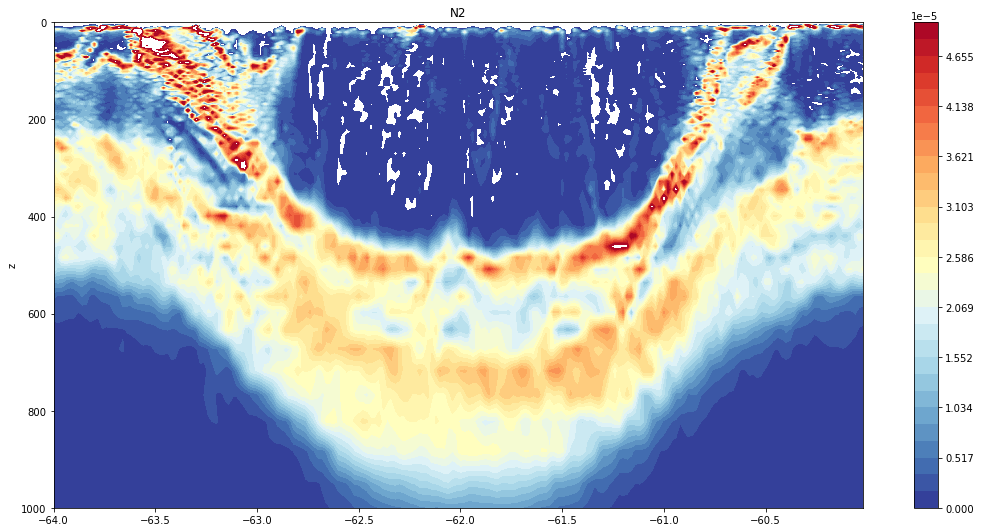

In [29]:
ylim=(1000,0)
levels=np.linspace(0,5e-5, 30)
clim = np.array([-0.025,-0.02])
fig, ax0 = plt.subplots( figsize=(15,7.5))
im = ax0.contourf(lon, depthi, toi, levels=levels,  cmap='RdYlBu_r')
fig.colorbar(im, ax=ax0)
ax0.set_ylim(ylim)
ax0.set_ylabel('z')
ax0.set_title('N2')
fig.tight_layout()
plt.savefig('../../../pics/Panel_Meeting/N2_vert.pdf', dpi=150, format='pdf')

/work/mh0033/u241317/miniconda3/envs/pyicon_py38/lib/python3.8/site-packages/matplotlib/colors.py:1202: RuntimeWarning: overflow encountered in true_divide
  resdat /= (vmax - vmin)


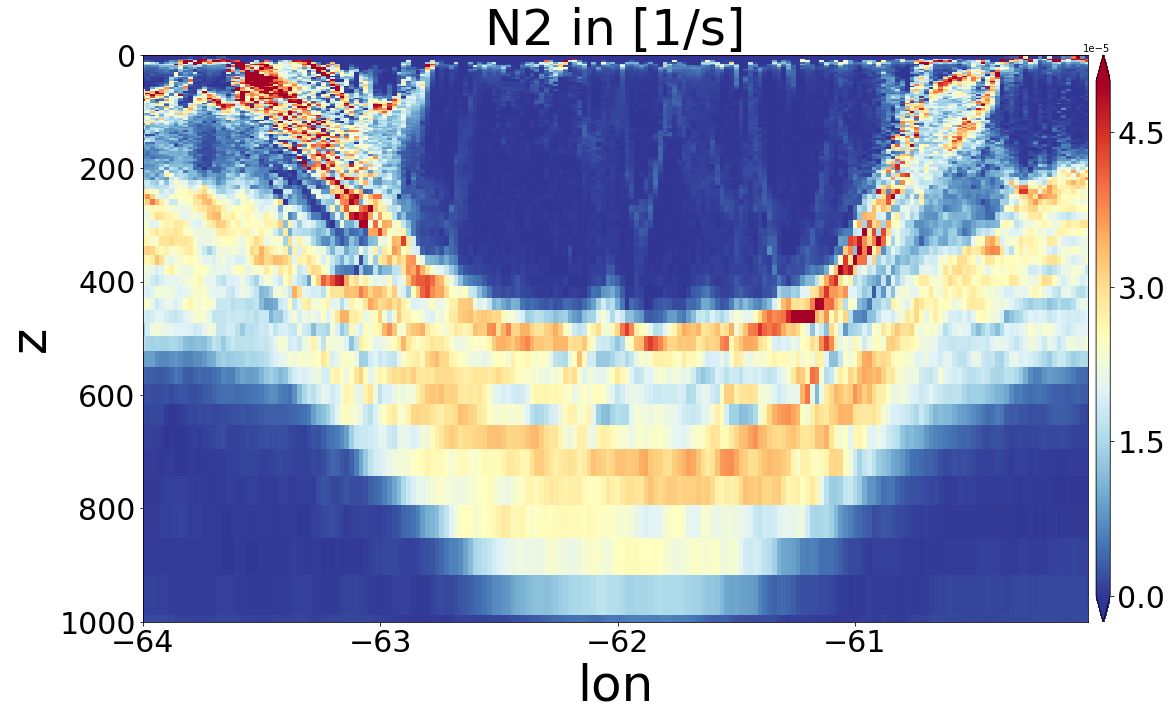

In [19]:
hca, hcb = pyic.arrange_axes(1, 1, plot_cb=True, asp=0.6, fig_size_fac=5,  axlab_kw=None, sharex=False)

ylim=(1000,0)
levels=np.linspace(0,5e-5, 30)
clim = 0, 5e-5
ii=-1
ii+=1; ax=hca[ii]; cax=hcb[ii]
pyic.shade(lon, depthi, toi, ax=ax, cax=cax, clim =clim,  contcolor='k',  contlw=2., cmap='RdYlBu_r')
#fig, ax0 = plt.subplots( figsize=(15,7.5))
#im = ax0.contourf(lon, depthi, toi,  levels=levels, cmap='RdYlBu_r', linestyles='solid')
#cbar = fig.colorbar(im, ax=ax0, format=ticker.FuncFormatter(fmt))
#cbar.set_label(label, size=10)
#ax.contour(lon, depthi, toi,  levels=levels, colors='black', linestyles='solid')

ax.set_title('N2 in [1/s]', fontsize='50')
ax.set_ylabel('z', fontsize='50')
ax.set_xlabel('lon', fontsize='50')
ax.tick_params(labelsize=30)
cax.tick_params(labelsize=30)
ax.set_ylim(ylim)
fig.tight_layout()
plt.savefig('../../../pics/Panel_Meeting/N2_vertnc.png', dpi=300, format='png', bbox_inches='tight')

In [88]:
fig.tight_layout()

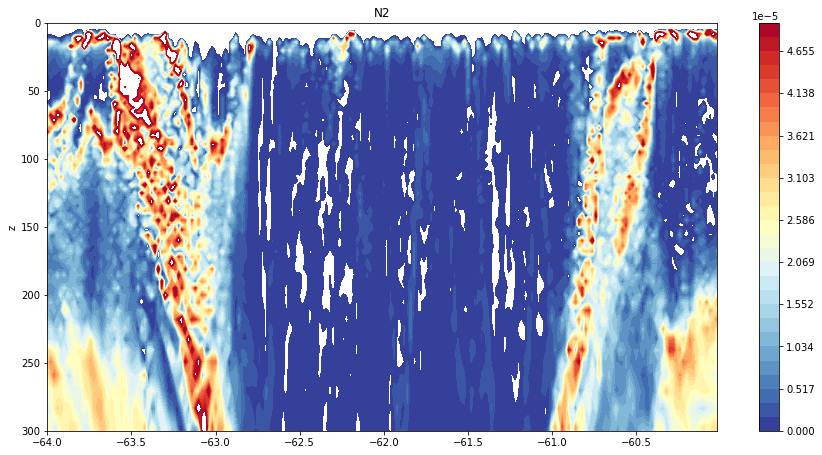

In [93]:
ylim=(300,0)
levels=np.linspace(0,5e-5, 30)
clim = np.array([-0.025,-0.02])
fig, ax0 = plt.subplots( figsize=(15,7.5))
im = ax0.contourf(lon, depthi, toi, levels=levels,  cmap='RdYlBu_r')
fig.colorbar(im, ax=ax0)
ax0.set_title('N2')
ax0.set_ylabel('z')
ax0.set_ylim(ylim)
plt.savefig('../../../pics/Panel_Meeting/N2_vert_z.pdf', dpi=150, format='pdf')

In [8]:
from math import radians, degrees, sin, cos, asin, acos, sqrt
def great_circle(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    return 6371 * (
        acos(sin(lat1) * sin(lat2) + cos(lat1) * cos(lat2) * cos(lon1 - lon2))
    )

In [9]:
distance = great_circle(-61, 39.8, -60.25, 39.8)
distance

64.07173510297275

In [10]:
N2_0 = dN2.N2.isel(cc=ic0)
N2_1 = dN2.N2.isel(cc=ic1)
b_0 = db.b.isel(cc=ic0)
b_1 = db.b.isel(cc=ic1)

In [11]:
b00 = b_0.sel(depthi=slice(50,150)).mean()
b01 = b_1.sel(depthi=slice(50,150)).mean()
M2 = np.square((b00-b01) / (distance*1e3))
M2

<xarray.DataArray 'b' ()>
array(3.81248093e-15)

In [47]:
N20 = b_0.sel(depthi=50, method="nearest") - b_0.sel(depthi=150, method="nearest") / 100

In [78]:
N20*9.81/1000

<xarray.DataArray 'b' ()>
array(-0.00015447)

In [22]:
N200 = N2_0.sel(depthi=slice(50,150)).sum() * 3 / 100 #gradient from 50 to 150 m depth
N201 = N2_1.sel(depthi=slice(50,150)).sum() * 3 / 100

In [26]:
N200 = N2_0.sel(depthi=slice(50,150)).mean()  #gradient from 50 to 150 m depth
N201 = N2_1.sel(depthi=slice(50,150)).mean() 

In [27]:
N2_ave = (N200+N201)/2

In [28]:
N2_ave

<xarray.DataArray 'N2' ()>
array(2.71518132e-07)

In [29]:
Ri = N2_ave * f2 / M2 #sum
Ri

<xarray.DataArray ()>
array(0.62246996)

In [25]:
Ri = N2_ave * f2 / M2 # mean
Ri

<xarray.DataArray ()>
array(0.61624528)

In [15]:
A = dw.w #.isel(depthi=6)
lon, lat, toi = pyic.interp_to_rectgrid(A, fpath_ckdtree, lon_reg=lon_regm, lat_reg=(lat_regm[0],lat_regm[0]+0.02))
toi = np.array(toi)
toi = toi.squeeze()

<ipython-input-21-ae8b6fd1cb03>:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax0.pcolormesh(lon, depthi, toi, vmin=-5e-3, vmax=5e-3,  cmap='RdYlBu_r')


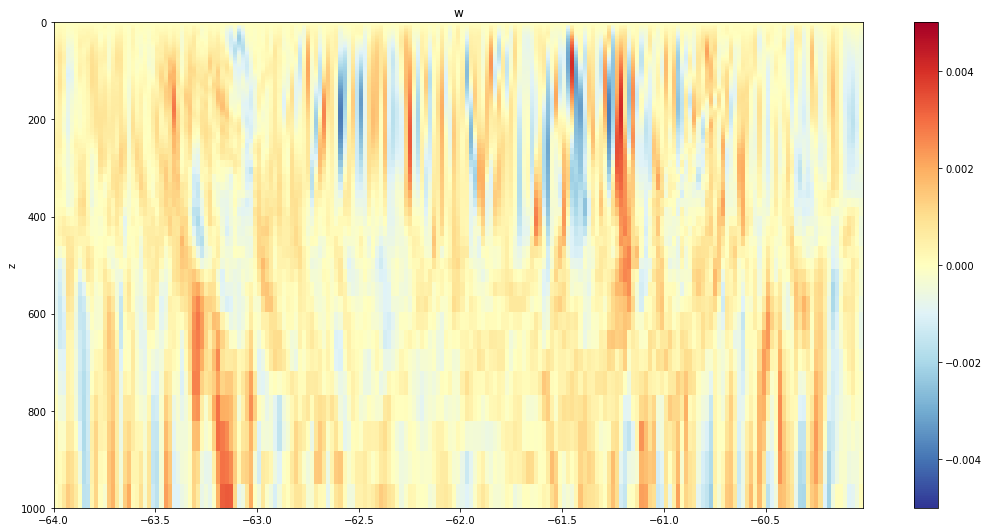

In [21]:
ylim=(1000,0)
#xlim=(-61.5,-60.25)
levels=np.linspace(-5e-2,5e-2, 30)
clim = np.array([-0.025,-0.02])
fig, ax0 = plt.subplots( figsize=(15,7.5))
im = ax0.pcolormesh(lon, depthi, toi, vmin=-5e-3, vmax=5e-3,  cmap='RdYlBu_r')
fig.colorbar(im, ax=ax0)
ax0.set_ylim(ylim)
#ax0.set_xlim(xlim)
ax0.set_ylabel('z')
ax0.set_title('w')
fig.tight_layout()
plt.savefig('../../../pics/Panel_Meeting/w_vert.pdf', dpi=150, format='pdf')

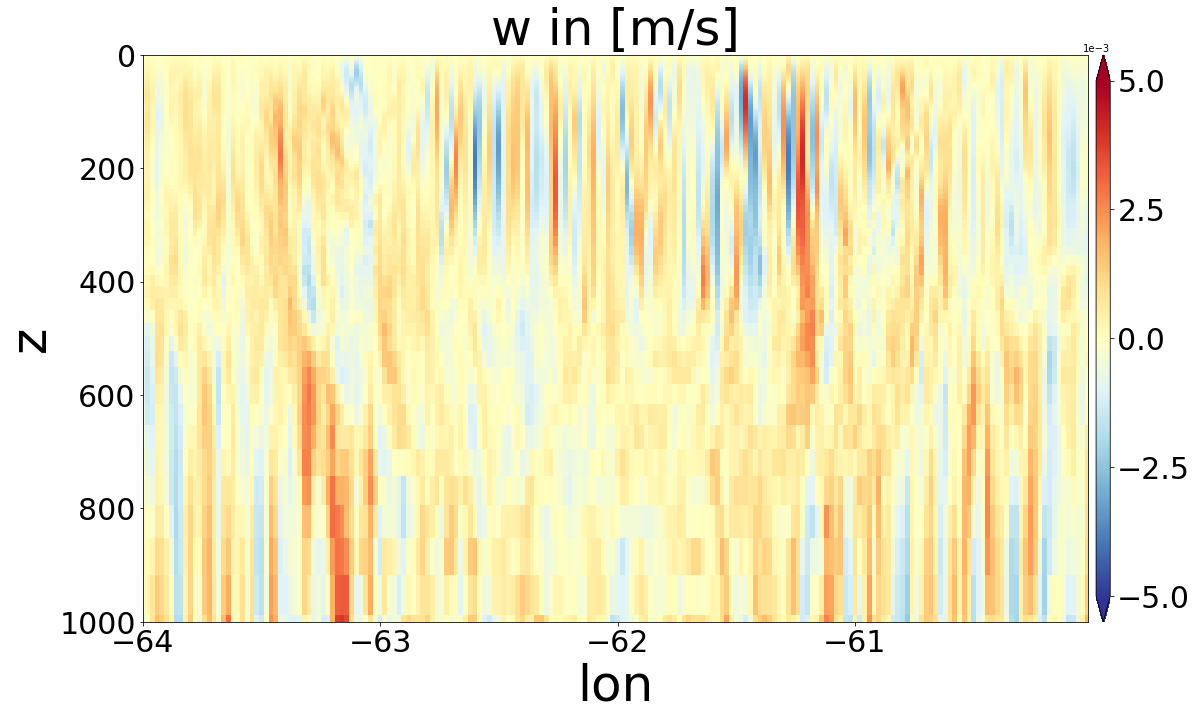

In [17]:
hca, hcb = pyic.arrange_axes(1, 1, plot_cb=True, asp=0.6, fig_size_fac=5,  axlab_kw=None, sharex=False)

ylim=(1000,0)
levels=np.linspace(0,5e-5, 30)
clim = -5e-3, 5e-3
ii=-1
ii+=1; ax=hca[ii]; cax=hcb[ii]
pyic.shade(lon, depthi, toi, ax=ax, cax=cax, clim=clim,   contcolor='k',  contlw=2., cmap='RdYlBu_r')
#fig, ax0 = plt.subplots( figsize=(15,7.5))
#im = ax0.contourf(lon, depthi, toi,  levels=levels, cmap='RdYlBu_r', linestyles='solid')
#cbar = fig.colorbar(im, ax=ax0, format=ticker.FuncFormatter(fmt))
#cbar.set_label(label, size=10)
#ax.contour(lon, depthi, toi,  levels=levels, colors='black', linestyles='solid')

ax.set_title('w in [m/s]', fontsize='50')
ax.set_ylabel('z', fontsize='50')
ax.set_xlabel('lon', fontsize='50')
ax.tick_params(labelsize=30)
cax.tick_params(labelsize=30)
ax.set_ylim(ylim)
fig.tight_layout()
plt.savefig('../../../pics/Panel_Meeting/w_vertnc.png', dpi=300, format='png', bbox_inches='tight')